In [1]:
from __future__ import division, print_function

import os
import numpy as np
import matplotlib.pyplot as plt

from corner import corner
from acor import acor

%matplotlib inline

def trace_plot(chain, pars,
               cols=3, wid_per_col=4, aspect=4/3,
               kwargs={}):

    rows = len(pars)//cols
    if rows*cols < len(pars):
        rows += 1

    ax = []
    width = wid_per_col * cols
    height = wid_per_col * rows / aspect
    fig = plt.figure(figsize=(width, height))

    for pp, par in enumerate(pars):
        ax.append(fig.add_subplot(rows, cols, pp+1))
        ax[pp].plot(chain[:,pp], **kwargs)
        ax[pp].set_xlabel(par)
    plt.tight_layout()
    return fig


def hist_plot(chain, pars, bins=30,
              cols=3, wid_per_col=4, aspect=4/3,
              kwargs={}):
    hist_kwargs = {
        'density':True,
        'histtype':'step',
    }
    for key, val in kwargs.items():
        hist_kwargs[key] = val

    rows = len(pars)//cols
    if rows*cols < len(pars):
        rows += 1

    ax = []
    width = wid_per_col * cols
    height = wid_per_col * rows / aspect
    fig = plt.figure(figsize=(width, height))

    for pp, par in enumerate(pars):
        ax.append(fig.add_subplot(rows, cols, pp+1))
        ax[pp].hist(chain[:,pp], bins=bins, **hist_kwargs)
        ax[pp].set_xlabel(par)
    plt.tight_layout()
    return fig

In [2]:
psr_name = 'J0030+0451'
runroot = '/home/pbaker/nanograv/noise_analysis/stochastic_12yr_analysis/notebooks/chains/rednoise_modelselection/'

rundir = os.path.join(runroot, psr_name, "preferred_UL")

In [3]:
# this changes depending on which "names" are used in enterprise....
with open(rundir + '/pars.txt', 'r') as f:
    params = [line.rstrip('\n') for line in f]

idx_WN = []
idx_RN = []
idx_DM = []
for ii,p in enumerate(params):
    if ('efac' in p) or ('equad' in p) or ('ecorr' in p):
        idx_WN.append(ii)
    elif 'dm_gp' in p:
        idx_DM.append(ii)
    else:
        idx_RN.append(ii)

par_WN = np.array(params)[idx_WN]
par_RN = np.array(params)[idx_RN]
par_DM = np.array(params)[idx_DM]

In [13]:
chain_raw = np.loadtxt(rundir + '/chain_1.txt')

burn = int(0.1 * len(chain_raw))
thin = 10

chain = chain_raw[burn::thin]

ch_WN = chain[:,idx_WN]
ch_RN = chain[:,idx_RN]
ch_DM = chain[:,idx_DM]
    
corr = acor(ch_RN[:,1])[0]
N = len(chain)
print("{:s}".format(psr_name))
print("N = {}, corr = {}, Neff = {}".format(N, corr, N/corr))

J0030+0451
N = 6219, corr = 1.34361564062, Neff = 4628.55582505


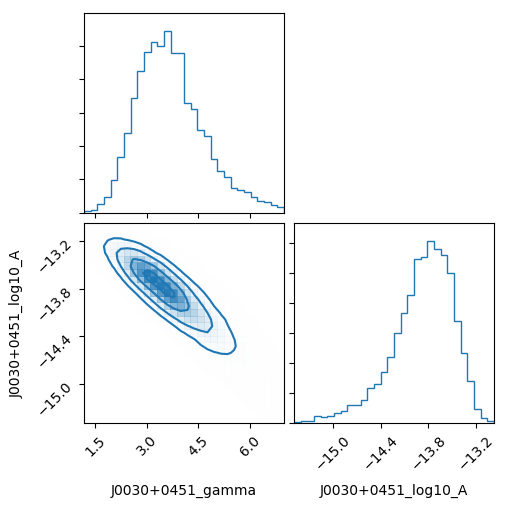

In [14]:
plt.rcParams.update(plt.rcParamsDefault)

corner_kwargs = {'bins':30,
                 'smooth':1.0,
                 'plot_datapoints':False,
                 'plot_density':True,
                 'plot_contours':True,
                 'fill_contours':False,}

corner(ch_RN, labels=par_RN, color='C0', **corner_kwargs)

In [15]:
UL = 10**np.percentile(ch_RN[:,1], 95)
print(UL)

4.437815537365327e-14


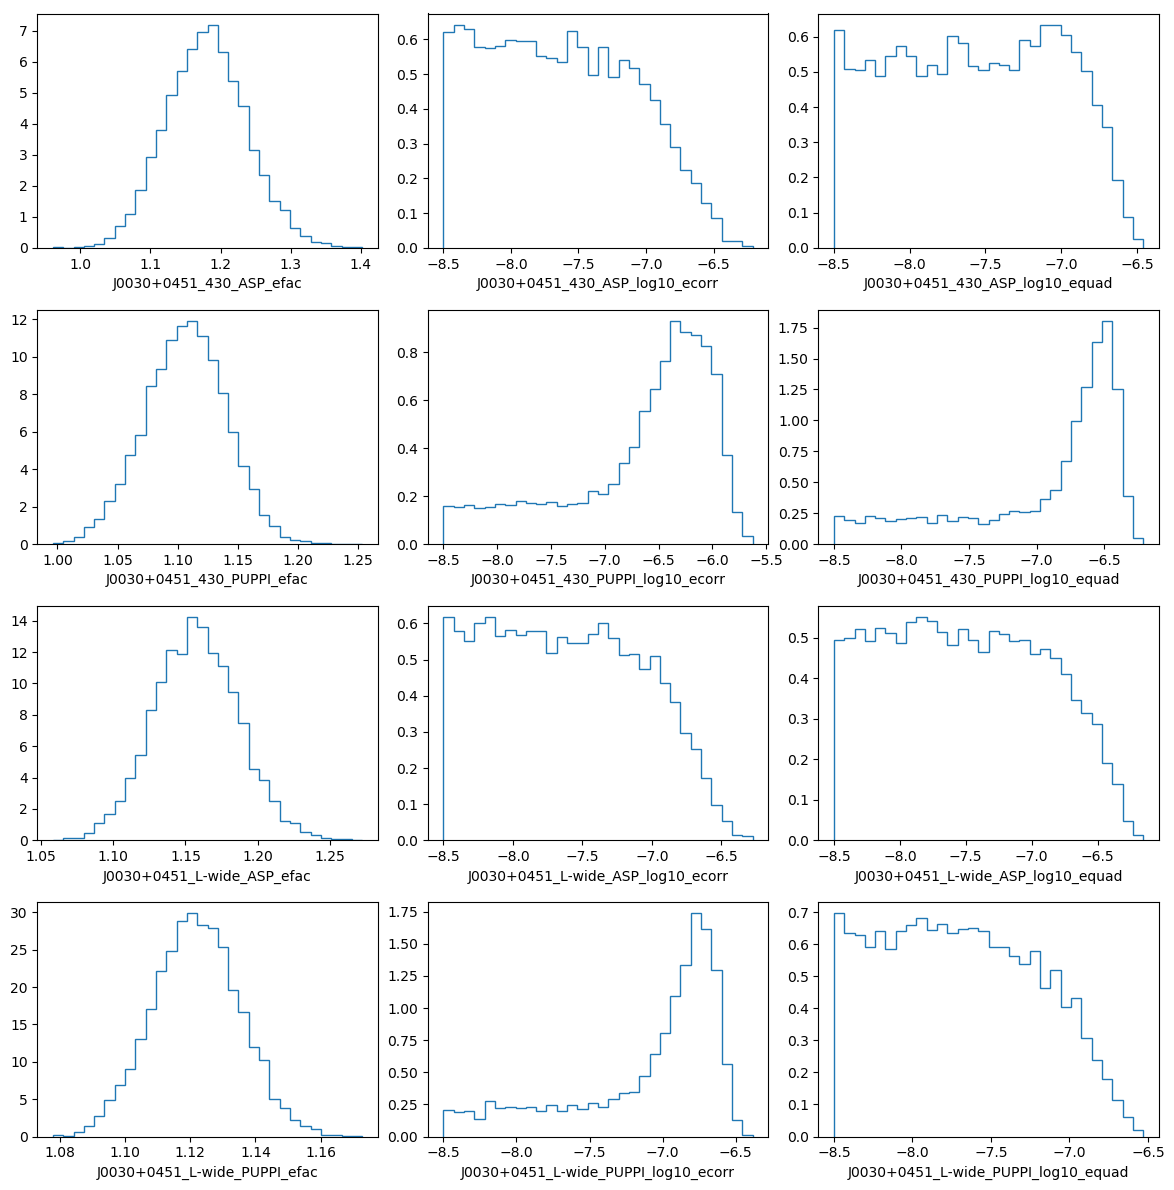

In [16]:
hist_plot(ch_WN, par_WN, )

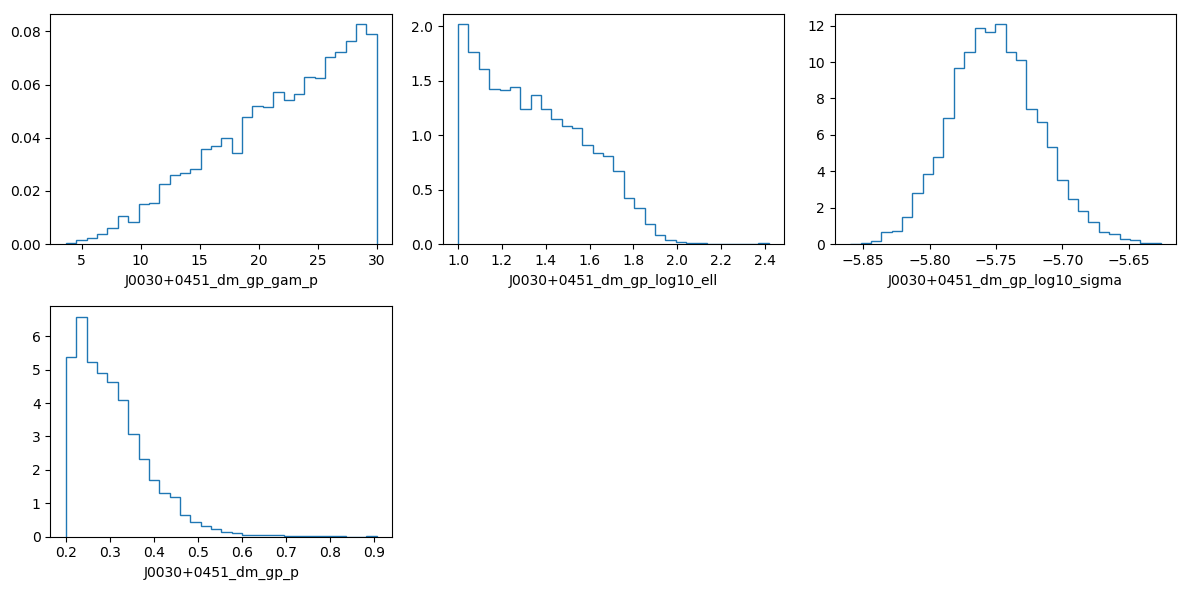

In [17]:
hist_plot(ch_DM, par_DM)

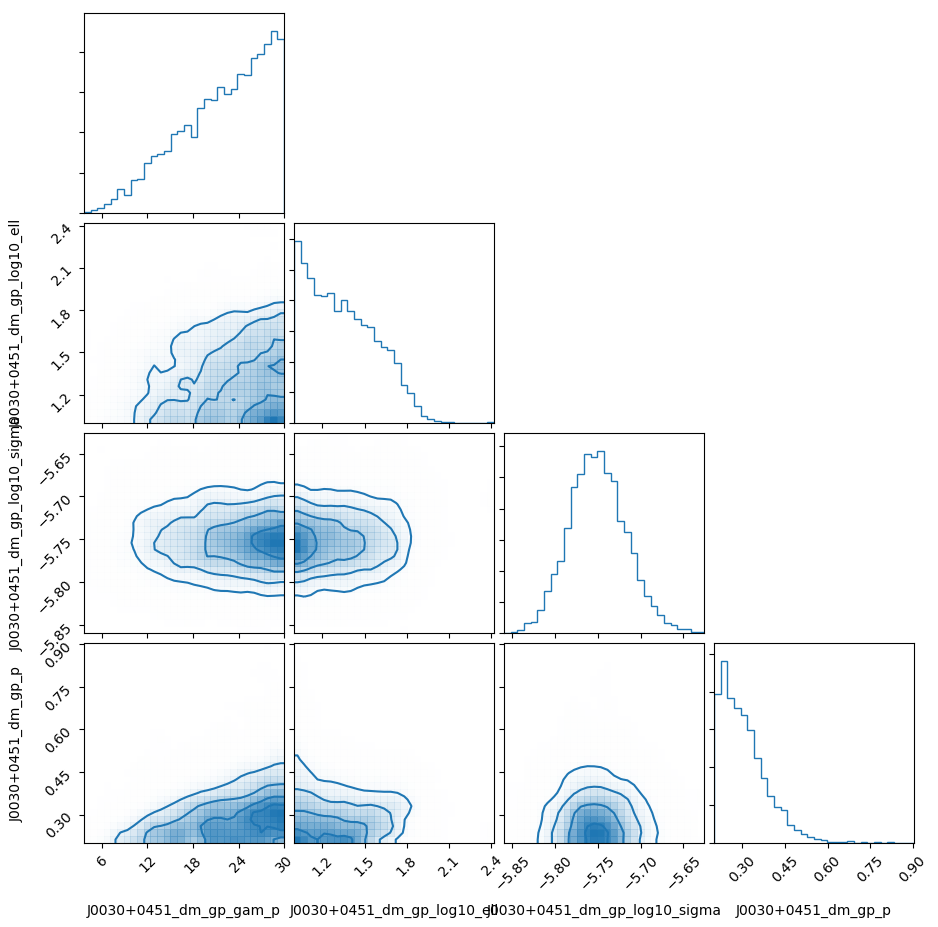

In [18]:
corner(ch_DM, labels=par_DM, color='C0', **corner_kwargs)

In [19]:
corner(chain[:,:-4], labels=params, color='C0', **corner_kwargs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [22]:
import json

noisefile = os.path.join('/home/pbaker/nanograv/noise_analysis/11yr_stochastic_analysis/nano11y_data/noisefiles/',
                         '{:s}_noise.json'.format(psr_name))
params = {}
with open(noisefile, 'r') as fp:
    params.update(json.load(fp))


In [23]:
params

{u'J0030+0451_430_ASP_efac': 1.2028,
 u'J0030+0451_430_ASP_log10_ecorr': -8.24937,
 u'J0030+0451_430_ASP_log10_equad': -7.08138,
 u'J0030+0451_430_PUPPI_efac': 1.10376,
 u'J0030+0451_430_PUPPI_log10_ecorr': -6.72474,
 u'J0030+0451_430_PUPPI_log10_equad': -6.46969,
 u'J0030+0451_L-wide_ASP_efac': 1.157,
 u'J0030+0451_L-wide_ASP_log10_ecorr': -8.32876,
 u'J0030+0451_L-wide_ASP_log10_equad': -8.42686,
 u'J0030+0451_L-wide_PUPPI_efac': 1.1193,
 u'J0030+0451_L-wide_PUPPI_log10_ecorr': -8.31331,
 u'J0030+0451_L-wide_PUPPI_log10_equad': -8.98169,
 u'J0030+0451_gamma': 4.15366,
 u'J0030+0451_log10_A': -14.0649}